In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


dataset = pd.read_csv("diabetes_prediction_dataset.csv")

    
#Converter strings male e female pra numeros
gender_mapping = {
    "Female" : 0.0,
    "Male" : 1.0
}
dataset['gender'] = dataset["gender"].map(gender_mapping)



#Converrter strings de smoking history 
le = LabelEncoder()
dataset['smoking_history'] = le.fit_transform(dataset['smoking_history'])

dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4,25.19,6.6,140,0
1,0.0,54.0,0,0,0,27.32,6.6,80,0
2,1.0,28.0,0,0,4,27.32,5.7,158,0
3,0.0,36.0,0,0,1,23.45,5.0,155,0
4,1.0,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,0,27.32,6.2,90,0
99996,0.0,2.0,0,0,0,17.37,6.5,100,0
99997,1.0,66.0,0,0,3,27.83,5.7,155,0
99998,0.0,24.0,0,0,4,35.42,4.0,100,0


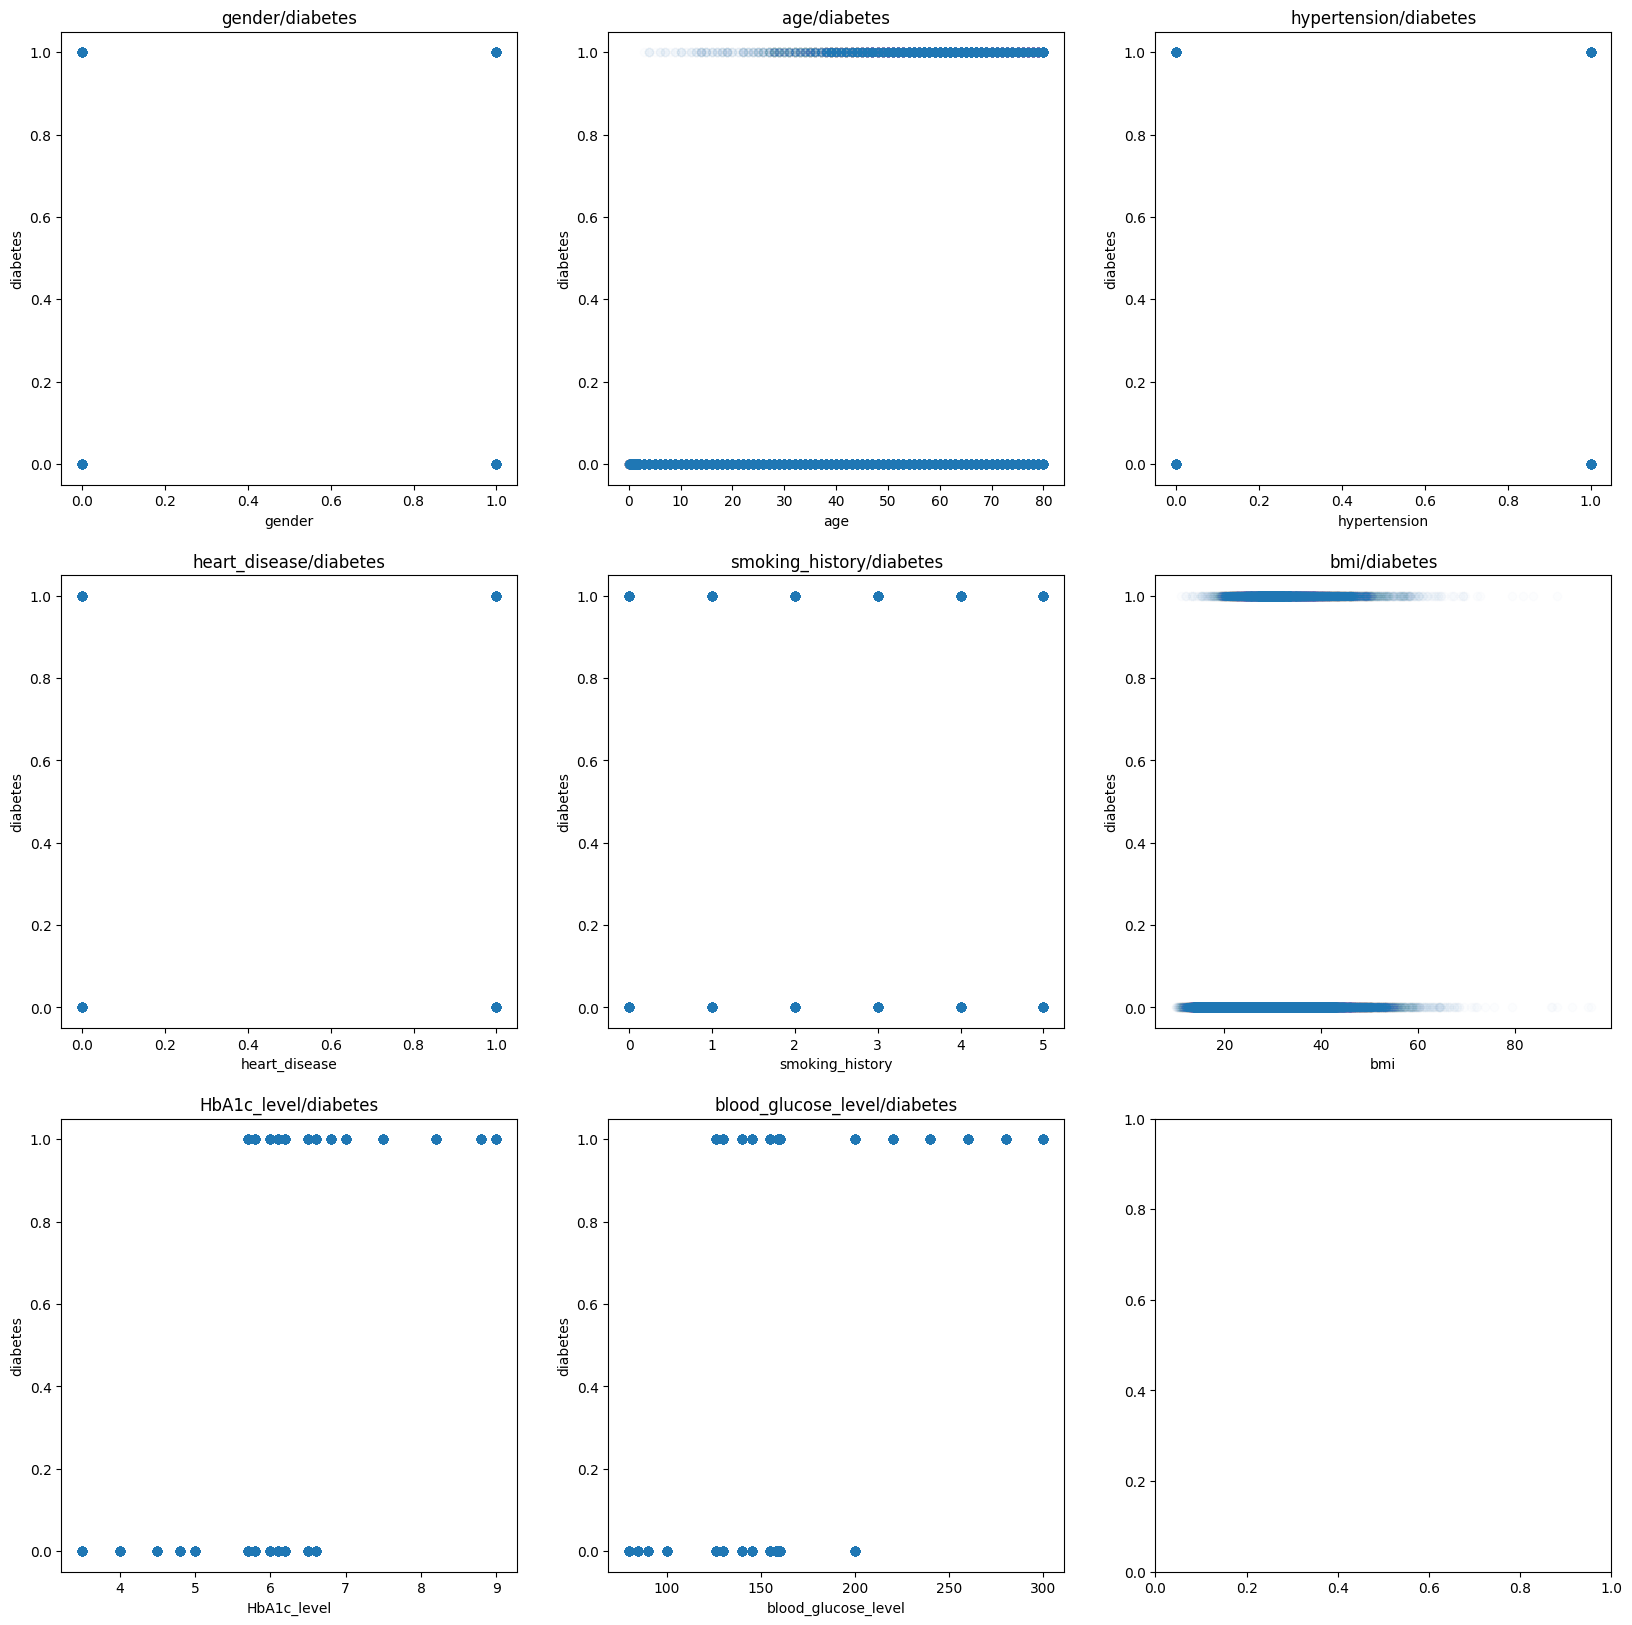

In [15]:
features = dataset.drop("diabetes", axis=1)
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
import matplotlib.colors as mcolors

axes = axes.ravel() 

for i, feature in enumerate(features):
    axes[i].scatter(dataset[feature], dataset['diabetes'], alpha=0.01)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('diabetes')
    axes[i].set_title(f'{feature}/diabetes')




In [17]:
from sklearn.model_selection import train_test_split
dataset = dataset.dropna() #Tirar os NaN (tinha NaN na label de diabetes)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=123)#random_state -> seed

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

x = train_dataset.drop("diabetes", axis=1)
y = train_dataset["diabetes"]

x_test = test_dataset.drop("diabetes", axis=1) #Dataset sem coluna diabetes
y_test = test_dataset["diabetes"]#Apenas coluna diabetes

for i in range(1, 20):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(x,y)
    y_pred = knn_classifier.predict(x_test)
    print(f"k={i}: {accuracy_score(y_test, y_pred)}")#k = 6 melhor


k=1: 0.940741111166675
k=2: 0.954993248987348
k=3: 0.9524928739310896
k=4: 0.9558933840076012
k=5: 0.9554433164974746
k=6: 0.9561934290143521
k=7: 0.956143421513227
k=8: 0.9553433014952243
k=9: 0.9555933390008501
k=10: 0.9555433314997249
k=11: 0.9559933990098515
k=12: 0.9551932789918488
k=13: 0.9555433314997249
k=14: 0.9544931739760965
k=15: 0.954993248987348
k=16: 0.9546932039805971
k=17: 0.954993248987348
k=18: 0.9539930989648447
k=19: 0.9543431514727209
